<a href="https://colab.research.google.com/github/C-Little26/ECGR4105/blob/main/Hw5/ECGR4105_Hw5_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#necessary libraries
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import torch
import tensorflow
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_un = 0.01 * t_u
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

In [3]:
#defining the nonlinear model
def nonlinear(t_u, w2, w1, b):
    return w2 * t_u**2 + w1 * t_u + b
#defining the linear model
def linear(t_u, w, b):
    return w * t_u + b
#define loss function
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()



In [4]:
w2 = torch.ones(())
w1 = torch.ones(())
b = torch.zeros(())

t_p = nonlinear(t_u,w2,w1,b)
#computing the loss
loss = loss_fn(t_p, t_c)

print(t_p)
print(loss)

tensor([1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
        1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600])
tensor(11709471.)


In [5]:
# Non-linear training loop
def nonlinear_loop(n_epochs, params, t_u, t_c, learning_rate):
    print(f'Learning Rate: {learning_rate}')
    for epoch in range(1, n_epochs+1):

        t_p = nonlinear (t_u, *params)
        loss = loss_fn(t_p, t_c)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print ('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params



In [6]:
# Linear training loop
def linear_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        t_p = linear (t_u, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print ('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [7]:
#establish variables for model iterations
learning_rate = [0.1, 0.01, 0.001, 0.0001]
sgd_params = torch.zeros(len(learning_rate), 3)
sgd_loss = torch.zeros(len(learning_rate), 1)
#run training for each learning rate using SGD
for i in learning_rate:
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
    optimizer = optim.SGD([params], lr=i)
    print(f'\nTraining with learning rate: {learning_rate}')
    sgd_params[learning_rate.index(i)] = nonlinear_loop(n_epochs = 5000, params = params, t_u = t_un, t_c = t_c, learning_rate = i)





Training with learning rate: [0.1, 0.01, 0.001, 0.0001]
Learning Rate: 0.1
Epoch 500, Loss 2.108456
Epoch 1000, Loss 2.090728
Epoch 1500, Loss 2.090720
Epoch 2000, Loss 2.090720
Epoch 2500, Loss 2.090721
Epoch 3000, Loss 2.090719
Epoch 3500, Loss 2.090720
Epoch 4000, Loss 2.090720
Epoch 4500, Loss 2.090720
Epoch 5000, Loss 2.090720

Training with learning rate: [0.1, 0.01, 0.001, 0.0001]
Learning Rate: 0.01
Epoch 500, Loss 26.266186
Epoch 1000, Loss 12.949670
Epoch 1500, Loss 6.968258
Epoch 2000, Loss 4.281574
Epoch 2500, Loss 3.074787
Epoch 3000, Loss 2.532740
Epoch 3500, Loss 2.289264
Epoch 4000, Loss 2.179901
Epoch 4500, Loss 2.130778
Epoch 5000, Loss 2.108713

Training with learning rate: [0.1, 0.01, 0.001, 0.0001]
Learning Rate: 0.001
Epoch 500, Loss 58.822189
Epoch 1000, Loss 48.348232
Epoch 1500, Loss 44.396774
Epoch 2000, Loss 41.118404
Epoch 2500, Loss 38.115955
Epoch 3000, Loss 35.345898
Epoch 3500, Loss 32.788918
Epoch 4000, Loss 30.428556
Epoch 4500, Loss 28.249678
Epoch 5

In [8]:
#run training for each learning rate using Adam
adam_params = torch.zeros(len(learning_rate), 3)
adam_loss = torch.zeros(len(learning_rate), 1)
for i in learning_rate:
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
    optimizer = optim.Adam([params], lr=i)
    print(f'\nTraining with learning rate: {learning_rate}')
    adam_params[learning_rate.index(i)] = nonlinear_loop(n_epochs = 5000, params = params, t_u = t_un, t_c = t_c, learning_rate = i)


Training with learning rate: [0.1, 0.01, 0.001, 0.0001]
Learning Rate: 0.1
Epoch 500, Loss 7.720606
Epoch 1000, Loss 2.183957
Epoch 1500, Loss 2.105043
Epoch 2000, Loss 2.103428
Epoch 2500, Loss 2.101665
Epoch 3000, Loss 2.099716
Epoch 3500, Loss 2.097688
Epoch 4000, Loss 2.095724
Epoch 4500, Loss 2.093984
Epoch 5000, Loss 2.092600

Training with learning rate: [0.1, 0.01, 0.001, 0.0001]
Learning Rate: 0.01
Epoch 500, Loss 57.949375
Epoch 1000, Loss 40.551365
Epoch 1500, Loss 33.974369
Epoch 2000, Loss 27.274963
Epoch 2500, Loss 20.752810
Epoch 3000, Loss 14.940594
Epoch 3500, Loss 10.199280
Epoch 4000, Loss 6.687758
Epoch 4500, Loss 4.367293
Epoch 5000, Loss 3.038020

Training with learning rate: [0.1, 0.01, 0.001, 0.0001]
Learning Rate: 0.001
Epoch 500, Loss 146.404602
Epoch 1000, Loss 129.578949
Epoch 1500, Loss 114.772308
Epoch 2000, Loss 101.786652
Epoch 2500, Loss 90.459236
Epoch 3000, Loss 80.654350
Epoch 3500, Loss 72.255226
Epoch 4000, Loss 65.156609
Epoch 4500, Loss 59.25738

In [9]:
#SGD with LR=0.1 is the best result
#compare that to linear
linear_train_params = torch.zeros(1, 2)
linear_train_loss = torch.zeros(1, 1)
lin_params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.SGD([lin_params], lr=learning_rate)
print(f'Linear model with LR={learning_rate}')
lin_train_params = linear_loop(n_epochs = 5000, optimizer = optimizer, params = lin_params, t_u = t_un, t_c = t_c)

Linear model with LR=0.1
Epoch 500, Loss 3.986502
Epoch 1000, Loss 2.946055
Epoch 1500, Loss 2.927963
Epoch 2000, Loss 2.927650
Epoch 2500, Loss 2.927644
Epoch 3000, Loss 2.927644
Epoch 3500, Loss 2.927644
Epoch 4000, Loss 2.927644
Epoch 4500, Loss 2.927644
Epoch 5000, Loss 2.927644


In [10]:
reset_params = torch.tensor([1.0,1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([reset_params], lr=0.1)
best_nonlin = nonlinear_loop(5000,reset_params,t_un,t_c,0.1)
t_non = nonlinear(t_u, *best_nonlin)
t_lin = linear(t_u, *lin_train_params)

t_non = t_non.detach().numpy()
t_lin = t_lin.detach().numpy()

Learning Rate: 0.1
Epoch 500, Loss 2.108456
Epoch 1000, Loss 2.090728
Epoch 1500, Loss 2.090720
Epoch 2000, Loss 2.090720
Epoch 2500, Loss 2.090721
Epoch 3000, Loss 2.090719
Epoch 3500, Loss 2.090720
Epoch 4000, Loss 2.090720
Epoch 4500, Loss 2.090720
Epoch 5000, Loss 2.090720


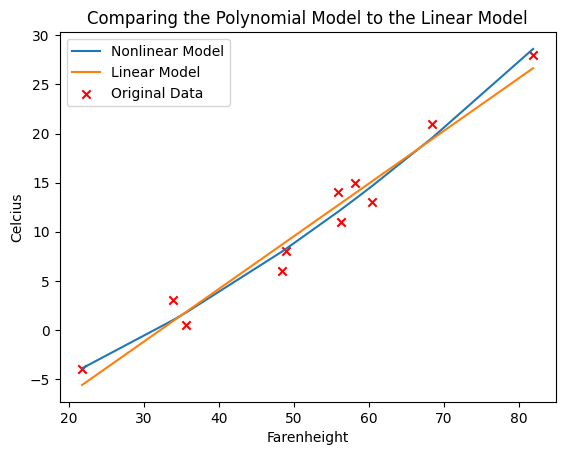

In [12]:
final_p = nonlinear(0.01 * t_u, *best_nonlin)
w1_slides = 5.3671
b_slides = -17.3012
p_slides = (w1_slides * (0.1 * t_u) + b_slides)

#sorting for easier graphing
t_un_sort, index = torch.sort(t_u)
t_un_sort = t_un_sort.detach().numpy()

final_p, index = torch.sort(final_p)
final_p = final_p.detach().numpy()
final_slides, index = torch.sort(p_slides)
final_slides = final_slides.detach().numpy()

t_u = t_u.detach().numpy()
t_c = t_c.detach().numpy()


plt.plot(t_un_sort, final_p, label = "Nonlinear Model",)
plt.plot(t_un_sort, final_slides, label = "Linear Model",)
plt.scatter(t_u, t_c, label = "Original Data", marker = 'x', c='r')
plt.xlabel("Farenheight")
plt.ylabel("Celcius")
plt.legend()
plt.title("Comparing the Polynomial Model to the Linear Model")
plt.show()